In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('oxfordmanrealizedvolatilityindices.csv',index_col = 0, parse_dates = True)
df_close = df[['Symbol','close_price']]

In [7]:
SPX_close = df_close.query('Symbol == ".SPX"')

In [16]:
SPX_close_price = SPX_close.close_price.values

In [35]:
SPX_close_log = np.log(SPX_close.close_price.pct_change().values)

In [38]:
SPX_close_pct_change = SPX_close.close_price.pct_change().values[1:]

In [39]:
SPX_difference_q = [np.mean(np.abs(SPX_close_pct_change[pos:] - SPX_close_pct_change[:-pos])**2) for pos in range(1,101)]

(0, 0.00031593581548330175)

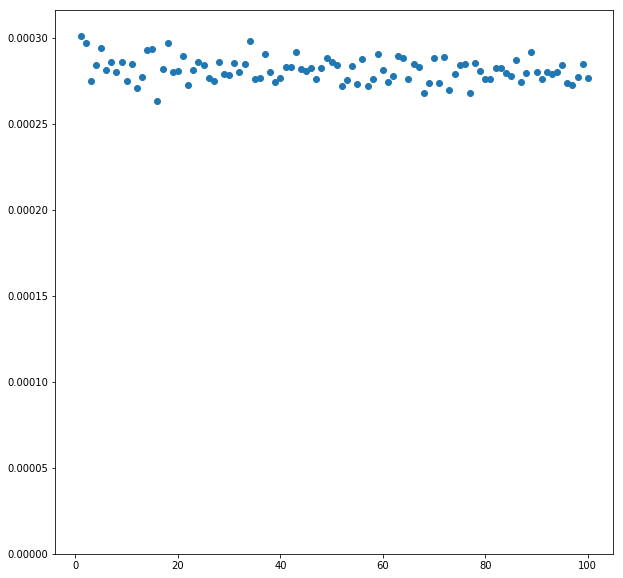

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(range(1,101),SPX_difference_q)
plt.ylim((0,1.05*max(SPX_difference_q)))